<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive Demonstration of Marginal, Joint and Conditional Probabilities and Distributions 

### Michael J. Pyrcz, Professor, The University of Texas at Austin 

*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

### Joint and Conditional Probabilities and Distributions

First, let's brielfy recall some basic concepts, but for a more complete discussion, please see the following lectures with linked Python demonstrations.

I have recorded a walk-through of this interactive dashboard in my [Data Science Interactive Python Demonstrations](https://www.youtube.com/playlist?list=PLG19vXLQHvSDy26fM3hDLg3VCU7U5BGZl) series on my [YouTube](https://www.youtube.com/@GeostatsGuyLectures) channel.

* Join me for walk-through of this dashboard [Chapter 01: Marginal, Joint and Conditional Probabilities and Distributions](https://www.youtube.com/watch?v=4eh8mTJf3O4&t=25s). I'm stoked to guide you, share observations and things to try out!

* I have a lecture on [Probability](https://www.youtube.com/watch?v=IGPayWv1BBM&t=140s) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ). Note, for all my recorded lecture the interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos).

* Also, I have a lecture on [Histograms, PDFs and CDFs](https://www.youtube.com/watch?v=TbqaMXdSV4I&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=9) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ). Note, for all my recorded lecture the interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos).

##### Probability 

Measure of the likelihood that an event will occur.  For random experiments and well-defined settings (such as coin tosses): 

\begin{equation}
Prob(𝐴)=P(𝐴)=lim_{𝑛\rightarrow \infty} \frac{𝑛(𝐴)}{𝑛(Ω)} 
\end{equation}

$n(A) =$ number of times event $A$ occurred $n(\Omega) =$ number of trails

##### Distribution

For a variable / feature a description of the likelihood or probability of occurrence over the range of possible values.

What do we get from a statistical distribution?

* what is the minimum and maximum?

* do we have a lot of low values?

* do we have a lot of high values?

* do we have outliers (values that don’t make sense and need explaining)?

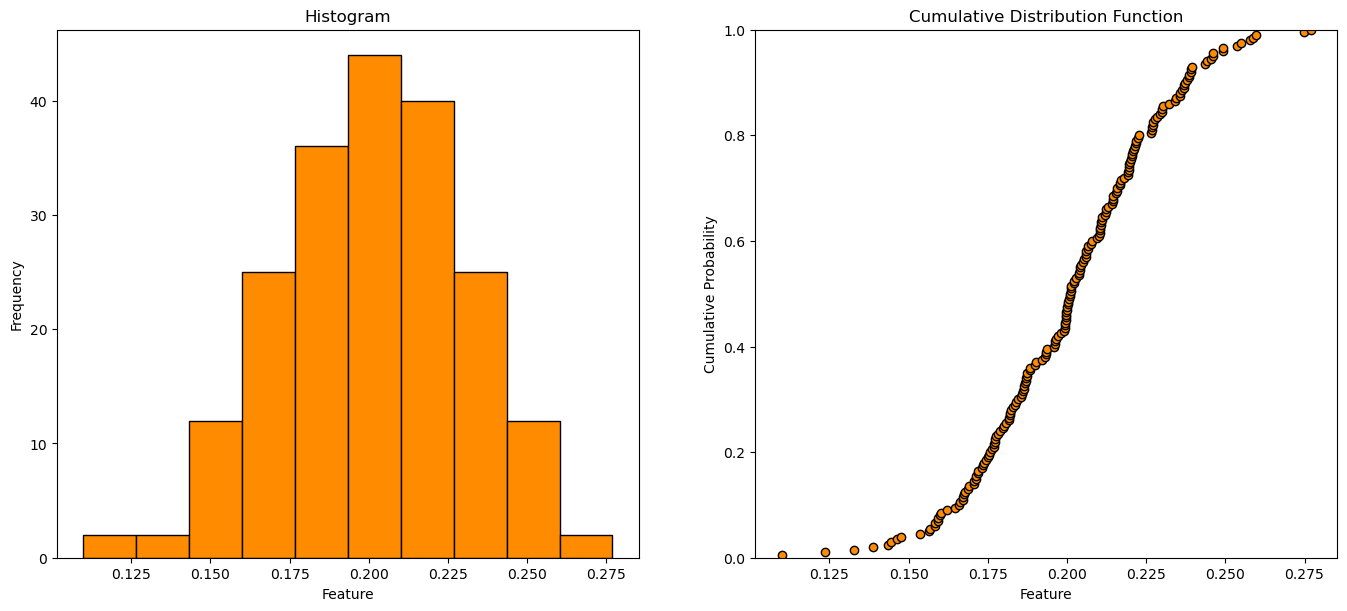

In [1]:
import numpy as np; import matplotlib.pyplot as plt               
Y = np.random.normal(loc = 0.2,scale=0.03,size=200)
plt.subplot(121)
plt.hist(Y,color='darkorange',edgecolor='black'); plt.xlabel('Feature'); plt.ylabel('Frequency'); plt.title('Histogram')
plt.subplot(122)
plt.scatter(np.sort(Y),np.arange(1,len(Y)+1,1)/len(Y),color='darkorange',edgecolor='black'); plt.xlabel('Feature'); plt.ylabel('Cumulative Probability'); plt.title('Cumulative Distribution Function'); plt.ylim([0,1])
plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.1); plt.show() # set plot size

##### Maginal, Joint or Conditional Probility or Distribution

**Marginal** - related to a single event $A$ or a single feature, probability $P(A)$ or distribution $f_X(x)$ 

**Joint** - related to more than one event $A$ or feature, probability $P(A,B,C)$ or distribution $f_{X,Y,Z}(x,y,z)$ 

**Conditional** - given a condition, the probability $P(A|B)$ [read as probability A given B] or distribution $f_{X|Y}(x|y)$ 

##### Pearson Product Moment Correlation Coefficient (Correlation Coefficient)

The correlation coefficient measures the linear relationship between two features:

\begin{equation}
\rho_{𝑋,𝑌}= \sum_{𝑖=1}^𝑛 \frac{(𝑥_𝑖 - \overline{x})(y_i - \overline{y})} {(𝑛−1) \sigma_𝑥 \sigma_𝑦 }, \quad −1.0 \le \rho_{X,Y} \le 1.0
\end{equation}

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 

That's all!

#### Load and Configure the Required Libraries

The following code loads the required libraries and sets a plotting default.

In [2]:
import os                                       # operating system
import numpy as np
import matplotlib.pyplot as plt                 # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
plt.rc('axes', axisbelow=False)                 # set axes and grids in the background for all plots
import matplotlib.patches as patches
from ipywidgets import interactive              # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import warnings
warnings.filterwarnings('ignore')               # supress warnings

#### Calculate a Synthetic Mining Grade Bivariate Dataset

Let's make a bivariate distribution for Gold and Silver grades with the following steps:

1. draw values from a bivariate Guassian distribution with some correlation
2. impose a nonlinear relationship with a specified weight
3. correct the mean and standard deviations of each feature

Then we scatter plot to check the data visually.

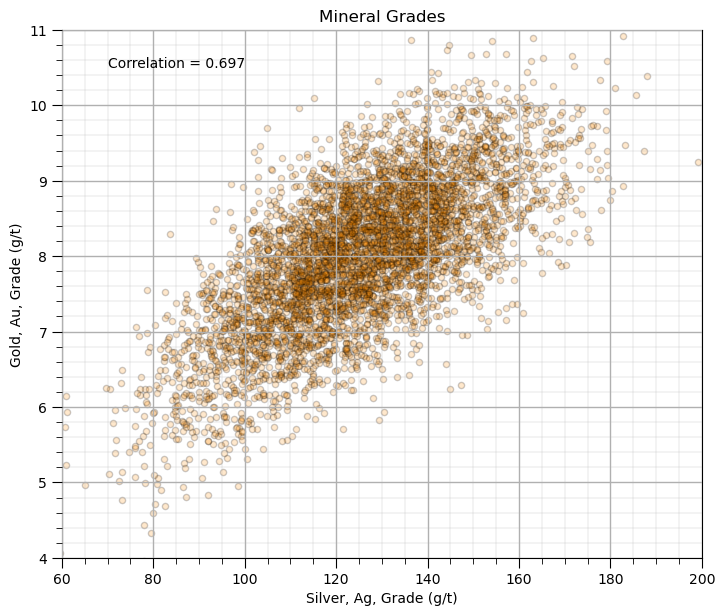

In [3]:
seed = 73073; n = 5000
Ag_mean = 125; Au_mean = 8
Ag_stdev = 20; Au_stdev = 1; wt_poly = 0.002
np.random.seed(seed=seed)
X = np.random.multivariate_normal([Au_mean,Ag_mean],[[9, 0],[0, 400]],size = n)
X[:,0] = (1.0-wt_poly)*X[:,0] + wt_poly*(-0.5*np.power(X[:,1]-200,2) + 10)
X[:,0] = (X[:,0] - np.mean(X[:,0])) * Au_stdev/np.std(X[:,0]) + Au_mean

plt.subplot(111)
plt.scatter(X[:,1],X[:,0],c='darkorange',s = 20,alpha=0.2,edgecolor='black')
plt.annotate('Correlation = ' + str(np.round(np.corrcoef(X[:,1],X[:,0])[0,1],3)),[70,10.5])
plt.xlabel('Silver, Ag, Grade (g/t)'); plt.ylabel('Gold, Au, Grade (g/t)'); plt.title('Mineral Grades')
plt.xlim([60,200]); plt.ylim([4,11])

plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.1); plt.show() # set plot size

#### Build the Interactive Dashboard to Demonstrate Joint Probability

The following code:

* take the previous synthetic dataset and specifiy events:
    * A - silver grade within a bin
    * B - gold grade within a bin
    
* calculate conditional probability, $P\{B , A\}$

In [4]:
l = widgets.Text(value='                               Joint Probability Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='750px', height='30px'))

n = widgets.IntSlider(min=0, max = 5000, value=1000, step = 100, description = 'n',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
ix = widgets.IntSlider(min=0, max = 6, value=1, step = 1, description = 'silver bin',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
iy = widgets.IntSlider(min=0, max = 6, value=1, step = 1, description = 'gold bin',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.HBox([n,ix,iy],)
ui2 = widgets.VBox([l,ui],)

def run_plot(n,ix,iy):
    seed = 73073
    Ag_mean = 125; Au_mean = 8
    Ag_stdev = 20; Au_stdev = 1; wt_poly = 0.002
    np.random.seed(seed=seed)
    X = np.random.multivariate_normal([Au_mean,Ag_mean],[[9, 0],[0, 400]],size = n)
    X[:,0] = (1.0-wt_poly)*X[:,0] + wt_poly*(-0.5*np.power(X[:,1]-200,2) + 10)
    X[:,0] = (X[:,0] - np.mean(X[:,0])) * Au_stdev/np.std(X[:,0]) + Au_mean
      
    xsiz = 20; ysiz=1;
    x_start = ix*xsiz + 60; x_end = (ix+1)*xsiz + 60
    y_start = iy*ysiz + 4; y_end = (iy+1)*ysiz + 4
    
    count = ((y_start < X[:,0]) & (X[:,0] < y_end) & (x_start < X[:,1]) & (X[:,1] < x_end)).sum()
    
    Xsub = X[((y_start < X[:,0]) & (X[:,0] < y_end) & (x_start < X[:,1]) & (X[:,1] < x_end))]
    
    fig, axs = plt.subplots(1,2,figsize=(16,7), gridspec_kw={'width_ratios': [0.8, 1]})
    
    axs[0].scatter(X[:,1],X[:,0],c='r',s = 20,alpha=0.2,edgecolor='black')
    axs[0].scatter(Xsub[:,1],Xsub[:,0],c='black',s = 20,alpha=0.6,edgecolor='black')
    axs[0].set_xlabel('Silver, Ag, Grade (g/t)'); axs[0].set_ylabel('Gold, Au, Grade (g/t)'); axs[0].set_title('Mineral Grades Scatter Plot')
    axs[0].set_xlim([60,200]); axs[0].set_ylim([4,11])
    
    axs[0].grid(True, which='major',linewidth = 1.0); axs[0].grid(True, which='minor',linewidth = 0.2) # add y grids
    axs[0].tick_params(which='major',length=7); axs[0].tick_params(which='minor', length=4)
    axs[0].xaxis.set_minor_locator(AutoMinorLocator(n=10)); axs[0].yaxis.set_minor_locator(AutoMinorLocator(n=10)) # turn on minor ticks
    axs[0].xaxis.set_major_locator(MultipleLocator(xsiz)); axs[0].yaxis.set_major_locator(MultipleLocator(ysiz)) # turn on minor ticks
    
    rect = patches.Rectangle((x_start, 4), xsiz, 7*ysiz, linewidth=3, edgecolor='green', facecolor='none'); axs[0].add_patch(rect)
    rect = patches.Rectangle((60, y_start), 7*xsiz, ysiz, linewidth=3, edgecolor='blue', facecolor='none'); axs[0].add_patch(rect)
    rect = patches.Rectangle((x_start, y_start), xsiz, ysiz, linewidth=5, edgecolor='black', facecolor='none'); axs[0].add_patch(rect)
    
    axs[0].annotate(r'A = [' + str(x_start) + r' ≤ $\bf{\theta_{Ag}}$ ≤ ' + str(x_end) + ']',
                    (150,4.6),color='green',weight="bold")
    
    axs[0].annotate(r'B = [' + str(y_start) + r' ≤ $\bf{\theta_{Au}}$ ≤ ' + str(y_end) + ']',
                    (150,4.3),color='blue',weight="bold")
    
    axs[0].annotate(r'$\bf{A}$',(x_start+0.4*xsiz,10.7),size=15,color='green')
    axs[0].annotate(r'$\bf{B}$',(61.5,y_start+0.4*ysiz),size=15,color='blue')
    axs[0].annotate(r'$\bf{A \bigcap B}$',(x_start+0.2*xsiz,y_start+0.4*ysiz),size=10,color='black')
    
    if ix <= 3:
        axs[0].annotate(r'n{A $\bigcap$ B} = ' + str(count),
                    (x_end+0.2*xsiz,y_start+ysiz*0.5),color='black',weight="bold")
    else:
        axs[0].annotate(r'n{A $\bigcap$ B} = ' + str(count),
                    (x_end-2.8*xsiz,y_start+ysiz*0.5),color='black',weight="bold")
    
    hist2d = axs[1].hist2d(X[:,1],X[:,0], bins=7, range=[[60,200],[4,11]], density=False, weights=None, cmin=None, cmax=None,
                       cmap=plt.cm.Reds)
    axs[1].set_xlabel('Silver, Ag, Grade (g/t)'); axs[1].set_ylabel('Gold, Au, Grade (g/t)'); axs[1].set_title('Mineral Grades Frequency Table')
    axs[1].set_xlim([60,200]); axs[1].set_ylim([4,11])
    
    cbar = plt.colorbar(hist2d[3], orientation="vertical")
    cbar.set_label('Frequency', rotation=270, labelpad=20)
    
    axs[1].grid(True, which='major',linewidth = 1.0); axs[1].grid(True, which='minor',linewidth = 0.2) # add y grids
    axs[1].tick_params(which='major',length=7); axs[1].tick_params(which='minor', length=4)
    axs[1].xaxis.set_minor_locator(AutoMinorLocator(n=10)); axs[1].yaxis.set_minor_locator(AutoMinorLocator(n=10)) # turn on minor ticks
    axs[1].xaxis.set_major_locator(MultipleLocator(xsiz)); axs[1].yaxis.set_major_locator(MultipleLocator(ysiz)) # turn on minor ticks
    
    rect = patches.Rectangle((x_start, 4), xsiz, 7*ysiz, linewidth=3, edgecolor='green', facecolor='none'); axs[1].add_patch(rect)
    rect = patches.Rectangle((60, y_start), 7*xsiz, ysiz, linewidth=3, edgecolor='blue', facecolor='none'); axs[1].add_patch(rect)
    rect = patches.Rectangle((x_start, y_start), xsiz, ysiz, linewidth=5, edgecolor='black', facecolor='none'); axs[1].add_patch(rect)
    
    axs[1].scatter(X[:,1],X[:,0],c='black',s = 20,alpha=0.1,edgecolor='black')
    axs[1].scatter(Xsub[:,1],Xsub[:,0],c='black',s = 20,alpha=0.3,edgecolor='black')
    
    axs[1].annotate(r'A = [' + str(x_start) + r' ≤ $\bf{\theta_{Ag}}$ ≤ ' + str(x_end) + ']',
                    (150,4.6),color='green',weight="bold")
    
    axs[1].annotate(r'$\bf{A}$',(x_start+0.4*xsiz,10.7),size=15,color='green')
    axs[1].annotate(r'$\bf{B}$',(61.5,y_start+0.4*ysiz),size=15,color='blue')
    axs[1].annotate(r'$\bf{A \bigcap B}$',(x_start+0.2*xsiz,y_start+0.4*ysiz),size=10,color='black')
    
    axs[1].annotate(r'B = [' + str(y_start) + r' ≤ $\bf{\theta_{Au}}$ ≤ ' + str(y_end) + ']',
                    (150,4.3),color='blue',weight="bold")
    
    if ix <= 3:
        z = axs[1].annotate(r'P{A $\bigcap$ B} = ' + str(count) + '/' + str(n),
                    (x_end+0.2*xsiz,y_start+ysiz*0.5),color='black',weight="bold")
    else:
        z = axs[1].annotate(r'P{A $\bigcap$ B} = ' + str(count) + '/' + str(n),
                    (x_end-3.5*xsiz,y_start+ysiz*0.5),color='black',weight="bold")

# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(run_plot, {'n':n,'ix':ix,'iy':iy,})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating   

### Interactive Joint Probability Demonstation 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Change the number of sample data, select silver and gold bins.

### The Inputs

* **n** - number of data, **$i_{\theta_{Ag}}$** - silver bin, and **$i_{\theta_{Au}}$** - gold bin 

In [5]:
display(ui2, interactive_plot)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'metadata': {}, 'data': {'text/plain': '<Figure size 1600x700 …

#### Build the Interactive Dashboard to Demonstrate Conditional Probability

The following code:

* take the previous synthetic dataset and specifiy events:
    * A - silver grade within a bin
    * B - gold grade within a bin
    
* calculate conditional probability, $P\{B | A\}$

In [6]:
l = widgets.Text(value='                               Conditional Probability Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='750px', height='30px'))

n = widgets.IntSlider(min=0, max = 5000, value=1000, step = 100, description = 'n',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
ix = widgets.IntSlider(min=0, max = 6, value=1, step = 1, description = 'silver bin',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
iy = widgets.IntSlider(min=0, max = 6, value=1, step = 1, description = 'gold bin',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.HBox([n,ix,iy],)
ui3 = widgets.VBox([l,ui],)

def run_plot(n,ix,iy):
    seed = 73073
    Ag_mean = 125; Au_mean = 8
    Ag_stdev = 20; Au_stdev = 1; wt_poly = 0.002
    np.random.seed(seed=seed)
    X = np.random.multivariate_normal([Au_mean,Ag_mean],[[9, 0],[0, 400]],size = n)
    X[:,0] = (1.0-wt_poly)*X[:,0] + wt_poly*(-0.5*np.power(X[:,1]-200,2) + 10)
    X[:,0] = (X[:,0] - np.mean(X[:,0])) * Au_stdev/np.std(X[:,0]) + Au_mean
      
    xsiz = 20; ysiz=1;
    x_start = ix*xsiz + 60; x_end = (ix+1)*xsiz + 60
    y_start = iy*ysiz + 4; y_end = (iy+1)*ysiz + 4
    
    count = ((y_start < X[:,0]) & (X[:,0] < y_end) & (x_start < X[:,1]) & (X[:,1] < x_end)).sum()
    count_a = ((x_start < X[:,1]) & (X[:,1] < x_end)).sum()
    count_b = ((y_start < X[:,0]) & (X[:,0] < y_end)).sum()
    
    Xsub_a = X[((x_start < X[:,1]) & (X[:,1] < x_end))]
    Xsub = X[((y_start < X[:,0]) & (X[:,0] < y_end) & (x_start < X[:,1]) & (X[:,1] < x_end))]
    
    fig, axs = plt.subplots(1,2,figsize=(16,7), gridspec_kw={'width_ratios': [0.8, 1]})
    
    axs[0].scatter(Xsub_a[:,1],Xsub_a[:,0],c='black',s = 20,alpha=0.4,edgecolor='black')
    axs[0].scatter(X[:,1],X[:,0],c='r',s = 20,alpha=0.2,edgecolor='black')
    axs[0].scatter(Xsub[:,1],Xsub[:,0],c='black',s = 20,alpha=0.8,edgecolor='black')
    axs[0].set_xlabel('Silver, Ag, Grade (g/t)'); axs[0].set_ylabel('Gold, Au, Grade (g/t)'); axs[0].set_title('Mineral Grades Scatter Plot')
    axs[0].set_xlim([60,200]); axs[0].set_ylim([4,11])
    
    axs[0].grid(True, which='major',linewidth = 1.0); axs[0].grid(True, which='minor',linewidth = 0.2) # add y grids
    axs[0].tick_params(which='major',length=7); axs[0].tick_params(which='minor', length=4)
    axs[0].xaxis.set_minor_locator(AutoMinorLocator(n=10)); axs[0].yaxis.set_minor_locator(AutoMinorLocator(n=10)) # turn on minor ticks
    axs[0].xaxis.set_major_locator(MultipleLocator(xsiz)); axs[0].yaxis.set_major_locator(MultipleLocator(ysiz)) # turn on minor ticks
    
    rect = patches.Rectangle((x_start, 4), xsiz, 7*ysiz, linewidth=3, edgecolor='green', facecolor='none'); axs[0].add_patch(rect)
    rect = patches.Rectangle((60, y_start), 7*xsiz, ysiz, linewidth=3,ls='--',edgecolor='blue', alpha=0.4, facecolor='none'); axs[0].add_patch(rect)
    rect = patches.Rectangle((x_start, y_start), xsiz, ysiz, linewidth=5, edgecolor='black', facecolor='none'); axs[0].add_patch(rect)
    
    axs[0].annotate(r'A = [' + str(x_start) + r' ≤ $\bf{\theta_{Ag}}$ ≤ ' + str(x_end) + ']',
                    (150,4.6),color='green',weight="bold")
    
    axs[0].annotate(r'B = [' + str(y_start) + r' ≤ $\bf{\theta_{Au}}$ ≤ ' + str(y_end) + ']',
                    (150,4.3),color='blue',weight="bold")
    
    axs[0].annotate(r'$\bf{A}$',(x_start+0.4*xsiz,10.7),size=15,color='green')
    axs[0].annotate(r'$\bf{B}$',(61.5,y_start+0.4*ysiz),size=15,color='blue')
    axs[0].annotate(r'$\bf{A \bigcap B}$',(x_start+0.2*xsiz,y_start+0.4*ysiz),size=10,color='black')
    
    if ix <= 3:
        axs[0].annotate(r'n{A $\bigcap$ B} = ' + str(count),
                    (x_end+0.2*xsiz,y_start+ysiz*0.6),color='black',weight="bold")
        axs[0].annotate(r'n{A} = ' + str(count_a),
                    (x_end+0.2*xsiz,y_start+ysiz*0.2),color='black',weight="bold")
    else:
        axs[0].annotate(r'n{A $\bigcap$ B} = ' + str(count),
                    (x_end-2.8*xsiz,y_start+ysiz*0.5),color='black',weight="bold")
    
    hist2d = axs[1].hist2d(X[:,1],X[:,0], bins=7, range=[[60,200],[4,11]], density=False, weights=None, cmin=None, cmax=None,
                       cmap=plt.cm.Reds)
    axs[1].set_xlabel('Silver, Ag, Grade (g/t)'); axs[1].set_ylabel('Gold, Au, Grade (g/t)'); axs[1].set_title('Mineral Grades Conditional Frequency Table')
    axs[1].set_xlim([60,200]); axs[1].set_ylim([4,11])
    
    cbar = plt.colorbar(hist2d[3], orientation="vertical")
    cbar.set_label('Frequency', rotation=270, labelpad=20)
    
    axs[1].grid(True, which='major',linewidth = 1.0); axs[1].grid(True, which='minor',linewidth = 0.2) # add y grids
    axs[1].tick_params(which='major',length=7); axs[1].tick_params(which='minor', length=4)
    axs[1].xaxis.set_minor_locator(AutoMinorLocator(n=10)); axs[1].yaxis.set_minor_locator(AutoMinorLocator(n=10)) # turn on minor ticks
    axs[1].xaxis.set_major_locator(MultipleLocator(xsiz)); axs[1].yaxis.set_major_locator(MultipleLocator(ysiz)) # turn on minor ticks
    
    rect = patches.Rectangle((60, 4), xsiz*ix, 7*ysiz, linewidth=0, edgecolor='none', facecolor='white'); axs[1].add_patch(rect)
    rect = patches.Rectangle((60+xsiz*(ix+1), 4), 60+xsiz*(7 - (ix+1)), 7*ysiz, linewidth=0, edgecolor='none', facecolor='white'); axs[1].add_patch(rect)
    
    rect = patches.Rectangle((x_start, 4), xsiz, 7*ysiz, linewidth=3, edgecolor='green', facecolor='none'); axs[1].add_patch(rect)
    rect = patches.Rectangle((60, y_start), 7*xsiz, ysiz, linewidth=3,ls='--',edgecolor='blue', alpha=0.4, facecolor='none'); axs[1].add_patch(rect)
    rect = patches.Rectangle((x_start, y_start), xsiz, ysiz, linewidth=5, edgecolor='black', facecolor='none'); axs[1].add_patch(rect)
    
    axs[1].scatter(Xsub_a[:,1],Xsub_a[:,0],c='black',s = 20,alpha=0.2,edgecolor='black')
    axs[1].scatter(X[:,1],X[:,0],c='black',s = 20,alpha=0.03,edgecolor='black')
    axs[1].scatter(Xsub[:,1],Xsub[:,0],c='black',s = 20,alpha=0.6,edgecolor='black')
    
    axs[1].annotate(r'A = [' + str(x_start) + r' ≤ $\bf{\theta_{Ag}}$ ≤ ' + str(x_end) + ']',
                    (150,4.6),color='green',weight="bold")
    
    axs[1].annotate(r'$\bf{A}$',(x_start+0.4*xsiz,10.7),size=15,color='green')
    axs[1].annotate(r'$\bf{B}$',(61.5,y_start+0.4*ysiz),size=15,color='blue')
    axs[1].annotate(r'$\bf{A \bigcap B}$',(x_start+0.2*xsiz,y_start+0.4*ysiz),size=10,color='black')
    
    axs[1].annotate(r'B = [' + str(y_start) + r' ≤ $\bf{\theta_{Au}}$ ≤ ' + str(y_end) + ']',
                    (150,4.3),color='blue',weight="bold")
    
    if ix <= 3:
        z = axs[1].annotate(r'P{B | A} = ' + str(count) + '/' + str(count_a),
                    (x_end+0.2*xsiz,y_start+ysiz*0.5),color='black',weight="bold")
    else:
        z = axs[1].annotate(r'P{B | A} = ' + str(count) + '/' + str(count_a),
                    (x_end-3.5*xsiz,y_start+ysiz*0.5),color='black',weight="bold")
        
# connect the function to make the samples and plot to the widgets    
interactive_plot2 = widgets.interactive_output(run_plot, {'n':n,'ix':ix,'iy':iy,})
interactive_plot2.clear_output(wait = True)               # reduce flickering by delaying plot updating   

### Interactive Conditional Probability Demonstation 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Change the number of sample data, select silver and gold bins.

### The Inputs

* **n** - number of data, **$i_{\theta_{Ag}}$** - silver bin, and **$i_{\theta_{Au}}$** - gold bin 

In [7]:
display(ui3, interactive_plot2)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'metadata': {}, 'data': {'text/plain': '<Figure size 1600x700 …

#### Build the Interactive Dashboard to Demonstrate Conditional Distributions

The following code:

* take the previous synthetic dataset and specifiy events:
    * A - silver grade within a bin
    * B - gold grade within a bin
    
* calculate conditional distributions, $f_{(B | A)}$ and $f_{(A | B)}$, as histograms and compare to the marginals, $f_B$ and $f_A$ respectively.

In [8]:
l = widgets.Text(value='                               Conditional Distributions Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='750px', height='30px'))

n = widgets.IntSlider(min=0, max = 5000, value=1000, step = 100, description = 'n',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
ix = widgets.IntSlider(min=0, max = 6, value=1, step = 1, description = 'silver bin',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
iy = widgets.IntSlider(min=0, max = 6, value=1, step = 1, description = 'gold bin',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.HBox([n,ix,iy],)
ui5 = widgets.VBox([l,ui],)

def run_plot5(n,ix,iy):
    seed = 73073
    Ag_mean = 125; Au_mean = 8;
    Ag_stdev = 20; Au_stdev = 1; wt_poly = 0.002
    np.random.seed(seed=seed)
    X = np.random.multivariate_normal([Au_mean,Ag_mean],[[9, 0],[0, 400]],size = n)
    X[:,0] = (1.0-wt_poly)*X[:,0] + wt_poly*(-0.5*np.power(X[:,1]-200,2) + 10)
    X[:,0] = (X[:,0] - np.mean(X[:,0])) * Au_stdev/np.std(X[:,0]) + Au_mean
      
    xsiz = 20; ysiz=1;
    x_start = ix*xsiz + 60; x_end = (ix+1)*xsiz + 60
    y_start = iy*ysiz + 4; y_end = (iy+1)*ysiz + 4
    
    count = ((y_start < X[:,0]) & (X[:,0] < y_end) & (x_start < X[:,1]) & (X[:,1] < x_end)).sum()
    count_a = ((x_start < X[:,1]) & (X[:,1] < x_end)).sum()
    count_b = ((y_start < X[:,0]) & (X[:,0] < y_end)).sum()
    
    Xsub_a = X[((x_start < X[:,1]) & (X[:,1] < x_end))]
    Xsub_b = X[((y_start < X[:,0]) & (X[:,0] < y_end))]
    Xsub = X[((y_start < X[:,0]) & (X[:,0] < y_end) & (x_start < X[:,1]) & (X[:,1] < x_end))]
        
    plt_scatter = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
    plt_x1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=plt_scatter)
    plt_x2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                               sharey=plt_scatter)    
    
    #plt.plot([0,0],[1.0,1.0],color = 'black')
    plt_scatter.scatter(Xsub_a[:,1],Xsub_a[:,0],color = 'none',edgecolor='green',alpha=0.9)
    plt_scatter.scatter(Xsub_b[:,1],Xsub_b[:,0],color = 'none',edgecolor='blue',alpha=0.9)
    plt_scatter.scatter(X[:,1],X[:,0],color = 'red',edgecolor='black',alpha=0.1,label='samples')
    #plt_scatter.scatter(sample[:,0],sample[:,1],color = 'red',alpha = 0.8,edgecolors='black',label = 'Samples')
    plt_scatter.legend(loc='upper left')  
    plt_scatter.set_xlabel('Silver, Ag, Grade (g/t)'); plt_scatter.set_ylabel('Gold, Au, Grade (g/t)'); 
    plt_scatter.set_title('Mineral Grades Conditional Frequency Table')
    plt_scatter.set_xlim([60,200]); plt_scatter.set_ylim([4,11]); plt_scatter.legend(loc='upper right')
    
    plt_scatter.grid(True, which='major',linewidth = 1.0); plt_scatter.grid(True, which='minor',linewidth = 0.2) # add y grids
    plt_scatter.tick_params(which='major',length=7); plt_scatter.tick_params(which='minor', length=4)
    plt_scatter.xaxis.set_minor_locator(AutoMinorLocator(n=10)); plt_scatter.yaxis.set_minor_locator(AutoMinorLocator(n=10)) # turn on minor ticks
    plt_scatter.xaxis.set_major_locator(MultipleLocator(xsiz)); plt_scatter.yaxis.set_major_locator(MultipleLocator(ysiz)) # turn on minor ticks
    
    #rect = patches.Rectangle((60, 4), xsiz*ix, 7*ysiz, linewidth=0, edgecolor='none', facecolor='white'); plt_scatter.add_patch(rect)
    #rect = patches.Rectangle((60+xsiz*(ix+1), 4), 60+xsiz*(7 - (ix+1)), 7*ysiz, linewidth=0, edgecolor='none', facecolor='white'); plt_scatter.add_patch(rect)
    
    rect = patches.Rectangle((x_start, 4), xsiz, 7*ysiz, linewidth=3, edgecolor='green', facecolor='none'); plt_scatter.add_patch(rect)
    rect = patches.Rectangle((60, y_start), 7*xsiz, ysiz, linewidth=3,edgecolor='blue', alpha=0.4, facecolor='none'); plt_scatter.add_patch(rect)
    
    plt_scatter.annotate(r'A = [' + str(x_start) + r' ≤ $\bf{\theta_{Ag}}$ ≤ ' + str(x_end) + ']',
                        (140,4.6),color='green',weight="bold")
        
    plt_scatter.annotate(r'B = [' + str(y_start) + r' ≤ $\bf{\theta_{Au}}$ ≤ ' + str(y_end) + ']',
                        (140,4.2),color='blue',weight="bold")
    plt_scatter.annotate(r'$\bf{A}$',(x_start+0.4*xsiz,10.6),size=15,color='green')
    plt_scatter.annotate(r'$\bf{B}$',(61.5,y_start+0.4*ysiz),size=15,color='blue')
    
    plt_x1.hist(X[:,1],density = True,color='red',alpha=0.3,edgecolor='black',bins=np.linspace(60,200,30),label='marginal')
    plt_x1.hist(Xsub_b[:,1],density = True,color='blue',alpha=0.3,edgecolor='black',bins=np.linspace(60,200,30),label='conditional')
    
    plt_x1.set_xlim([60,200]); plt_x1.legend(loc='upper right')
    #plt_x1.set_xlabel('Silver, Ag, Grade (g/t)'); plt_x1.set_ylabel(r'Density')
    plt_x1.set_title(r'Marginal and Conditional Distributions')
    
    plt_x2.hist(X[:,0],orientation='horizontal',density = True,color='red',alpha=0.3,edgecolor='black',bins=np.linspace(4,11,30),label='marginal')
    plt_x2.hist(Xsub_a[:,0],orientation='horizontal',density = True,color='green',alpha=0.3,edgecolor='black',bins=np.linspace(4,11,30),label='conditional')
    
    plt_x2.set_ylim([4,11]); plt_x2.legend(loc='upper right')
    #plt_x2.set_ylabel('Gold, Au, Grade (g/t)'); plt_x2.set_xlabel(r'Density')
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=1.2, wspace=0.3, hspace=0.4); plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot5 = widgets.interactive_output(run_plot5, {'n':n,'ix':ix,'iy':iy,})
interactive_plot5.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Conditional Distribution Demonstration 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

Change the number of sample data, select silver and gold bins.

### The Inputs

* **n** - number of data, **$i_{\theta_{Ag}}$** - silver bin, and **$i_{\theta_{Au}}$** - gold bin 

In [9]:
display(ui5, interactive_plot5)                           # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'metadata': {}, 'data': {'text/plain': '<Figure size 640x480 w…

#### Comments

This was a basic demonstration marginal, joint and conditional probabilities. I have many other demonstrations and even basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)